In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('output.csv')
df['Theory Time Complexity'] = df['Decomposition Overhead Ratio'] * 20 * np.power(3, df['Tree Width'])
df = df[['Graph ID', 'Tree decomposition ID', 'Tree Width', 'units', 'predict units', 'Theory Time Complexity']]

df

,Graph ID,Tree decomposition ID,Tree Width,units,predict units,Theory Time Complexity
0,1,1,2.0,2862,2.641726e+03,306.0
1,1,2,2.0,2705,2.605712e+03,306.0
2,1,3,2.0,2732,2.691822e+03,306.0
3,1,4,2.0,2523,2.377767e+03,306.0
4,1,5,2.0,2722,2.698637e+03,306.0
...,...,...,...,...,...,...
19995,200,96,13.0,745238640,6.216991e+08,135517455.0
19996,200,97,13.0,749864731,6.917038e+08,135517455.0
19997,200,98,13.0,741479760,6.494700e+08,135517455.0
19998,200,99,13.0,248016868,3.623936e+08,138706101.0


In [3]:
ave_df = df.groupby('Graph ID').mean().reset_index()

ave_df

,Graph ID,Tree decomposition ID,Tree Width,units,predict units,Theory Time Complexity
0,1,50.5,2.00,2.688850e+03,2.603810e+03,3.060000e+02
1,2,50.5,2.00,2.741120e+03,2.565375e+03,3.330000e+02
2,3,50.5,2.00,2.744150e+03,2.643287e+03,3.690000e+02
3,4,50.5,2.00,2.970780e+03,2.917283e+03,3.780000e+02
4,5,50.5,2.00,2.750720e+03,2.722445e+03,3.690000e+02
...,...,...,...,...,...,...
195,196,50.5,12.00,2.678743e+08,2.310648e+08,4.782969e+07
196,197,50.5,12.00,1.876560e+08,2.503462e+08,4.852588e+07
197,198,50.5,12.45,4.938503e+08,4.529031e+08,7.982244e+07
198,199,50.5,12.00,2.922911e+08,2.674039e+08,4.836113e+07


In [4]:
ML_df = df.groupby('Graph ID')['predict units'].apply(lambda x: x[x == x.min()].index).reset_index(name='min_index')
ML_df = df.loc[[i[0] for i in ML_df['min_index'].values]]

ML_df

,Graph ID,Tree decomposition ID,Tree Width,units,predict units,Theory Time Complexity
70,1,71,2.0,2303,2.140648e+03,306.0
105,2,6,2.0,2526,2.158036e+03,333.0
205,3,6,2.0,2161,2.286252e+03,369.0
381,4,82,2.0,2596,2.776825e+03,378.0
445,5,46,2.0,2339,2.431632e+03,369.0
...,...,...,...,...,...,...
18865,196,66,12.0,264585651,2.040197e+08,47829690.0
18912,197,13,12.0,166091494,2.183461e+08,48892572.0
19008,198,19,12.0,276615086,2.045430e+08,47298249.0
19064,199,10,12.0,230538343,2.275866e+08,48361131.0


In [5]:
TC_df = df.groupby('Graph ID')['Theory Time Complexity'].apply(lambda x: x[x == x.min()].index).reset_index(name='min_index')
TC_df = df.loc[[i[0] for i in TC_df['min_index'].values]]

TC_df

,Graph ID,Tree decomposition ID,Tree Width,units,predict units,Theory Time Complexity
0,1,1,2.0,2862,2.641726e+03,306.0
100,2,1,2.0,2969,2.477515e+03,333.0
200,3,1,2.0,2879,2.661201e+03,369.0
300,4,1,2.0,3264,3.001370e+03,378.0
400,5,1,2.0,2951,2.636384e+03,369.0
...,...,...,...,...,...,...
18800,196,1,12.0,233569467,2.115598e+08,47829690.0
18900,197,1,12.0,215640600,2.641340e+08,48361131.0
19000,198,2,12.0,296591655,2.045902e+08,47298249.0
19055,199,1,12.0,262871251,2.555816e+08,48361131.0


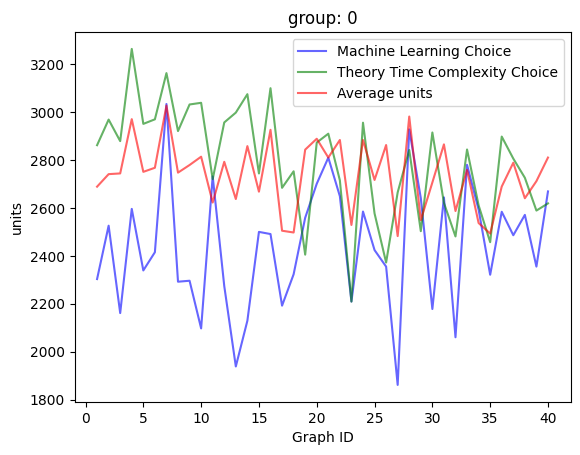

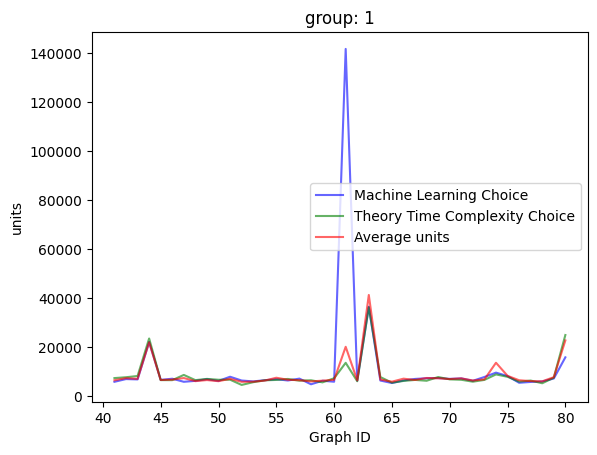

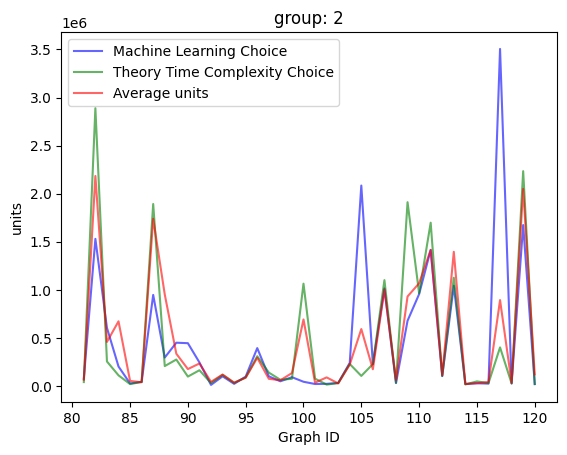

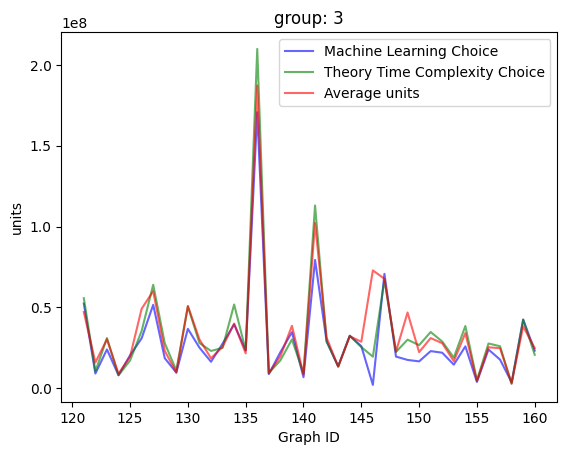

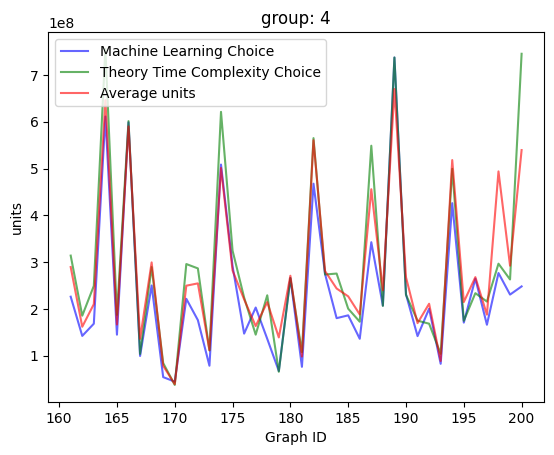

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

for i in range(5):
    L = i*40 + 1
    R = L+39
    
    sns.lineplot(x=ML_df[(L <= ML_df['Graph ID']) & (ML_df['Graph ID'] <= R)]['Graph ID'], y=ML_df[(L <= ML_df['Graph ID']) & (ML_df['Graph ID'] <= R)]['units']  , label = 'Machine Learning Choice'      , color = 'blue'  , alpha = 0.6)
    sns.lineplot(x=TC_df[(L <= TC_df['Graph ID']) & (TC_df['Graph ID'] <= R)]['Graph ID'], y=TC_df[(L <= TC_df['Graph ID']) & (TC_df['Graph ID'] <= R)]['units']  , label = 'Theory Time Complexity Choice', color = 'green' , alpha = 0.6)
    sns.lineplot(x=ave_df[(L <= ave_df['Graph ID']) & (ave_df['Graph ID'] <= R)]['Graph ID'], y=ave_df[(L <= ave_df['Graph ID']) & (ave_df['Graph ID'] <= R)]['units'], label = 'Average units'                , color = 'red'   , alpha = 0.6)

    plt.title(f'group: {i}')
    plt.legend()
    plt.show()

In [7]:

sum = 0
tot = 0
gtot = 0
for v in (ML_df['units'].values / ave_df['units'].values):
    if v > 2:
        gtot += 1
        continue
    tot += 1
    sum += v

print(gtot/(gtot+tot))
sum/tot

0.02


0.8741913076092057

In [8]:
sum = 0
tot = 0
gtot = 0
for v in (ML_df['units'].values / TC_df['units'].values):
    if v > 2:
        gtot += 1
        continue
    tot += 1
    sum += v

sum/tot

0.9104930070309408